Análisis de sentimientos Caso Práctico Twitter

In [39]:
#pip install textblob

In [40]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import re

In [41]:
# Leer el archivo CSV
data = pd.read_csv(r'C:\Users\dg_su\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Ciencia de Datos con Python IEEE AESS\codigo\archivos\archivos NLP\comentarios.csv')

In [42]:
# Función para limpiar el texto
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'\[.*?\]', '', texto)  # Eliminar texto entre corchetes
    texto = re.sub(r'https?://\S+|www\.\S+', '', texto)  # Eliminar URLs
    texto = re.sub(r'<.*?>+', '', texto)  # Eliminar etiquetas HTML
    texto = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', '', texto)  # Eliminar puntuación
    texto = re.sub(r'\w*\d\w*', '', texto)  # Eliminar palabras con números
    texto = re.sub(r'\s+', ' ', texto).strip()  # Eliminar espacios extra
    
    return texto

In [43]:
# Limpiar los comentarios
data['comentario'] = data['comentario'].fillna('').apply(limpiar_texto)

In [44]:
# Imprimir comentarios limpios para verificación
print("Comentarios limpios:")
print(data['comentario'])


Comentarios limpios:
Este producto es excelente                                               muy contento con la compra.
El producto es de mala calidad                                                     no lo recomiendo.
El servicio al cliente fue muy amable y resolvió todas mis dudas.                                   
El envío fue muy rápido                                              estoy satisfecho con la compra.
No estoy contento con el producto                                                      llegó dañado.
Name: comentario, dtype: object


In [45]:
# Función para obtener el sentimiento de un comentario
def obtener_sentimiento(comentario):
    if comentario.strip() == '':
        return 'Neutral'  # Considerar comentarios vacíos como neutrales
    analisis = TextBlob(comentario)
    print(f"Comentario: {comentario}, Polaridad: {analisis.sentiment.polarity}")  # Agregar línea de depuración
    if analisis.sentiment.polarity > 0.1:  # Ajustar umbral para positivo
        return 'Positivo'
    elif analisis.sentiment.polarity < -0.1:  # Ajustar umbral para negativo
        return 'Negativo'
    else:
        return 'Neutral'


In [46]:
# Aplicar la función a cada comentario en el DataFrame
data['sentimiento'] = data['comentario'].apply(obtener_sentimiento)

Comentario: muy contento con la compra., Polaridad: 0.0
Comentario: no lo recomiendo., Polaridad: 0.0
Comentario: estoy satisfecho con la compra., Polaridad: 0.0
Comentario: llegó dañado., Polaridad: 0.0


In [50]:
# Contar el número de comentarios en cada categoría de sentimiento
conteo_sentimientos = data['sentimiento'].value_counts()

In [51]:
# Mostrar los resultados
print(conteo_sentimientos)

sentimiento
Neutral    5
Name: count, dtype: int64


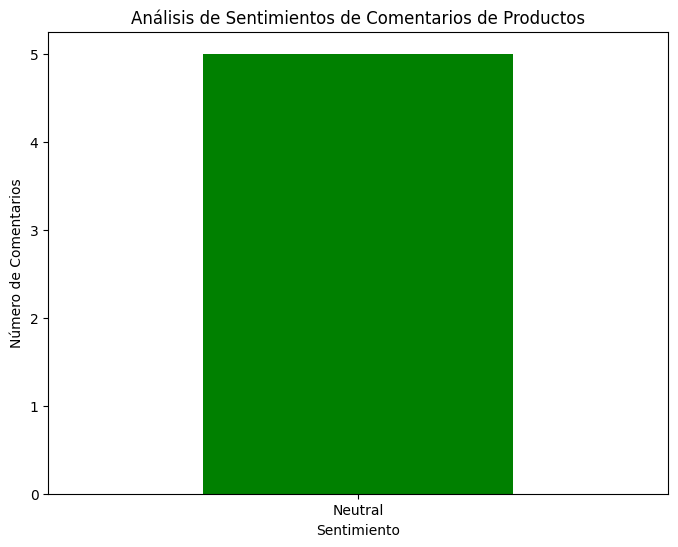

In [52]:
# Graficar los resultados
plt.figure(figsize=(8, 6))
conteo_sentimientos.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Análisis de Sentimientos de Comentarios de Productos')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Comentarios')
plt.xticks(rotation=0)
plt.show()